# Eric Harrison

## Research question/interests

**Which NHL team drafts the most successful NHL players? What differentiates these teams from the other teams in terms of drafting patterns?**
     
    I plan to answer this question by comparing the games played and points of all players drafted to find which teams have the best drafting history. From there I can compare the distributions of players drafted by each team, and see if there are any notiecable differences between the teams that are better at drafting and the other teams.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
sns.set_theme(style="ticks",
              font_scale=1.3, # This scales the fonts slightly higher
             )
# And we're going to remove the top and right axis lines
import matplotlib.pyplot as plt
plt.rc("axes.spines", top=False, right=False)

In [ ]:
#Loading and processing data into df1982
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    from .code import project_functions1
else:
    import sys
    sys.path.append("./code")
    import project_functions1

df1982 = project_functions1.load_and_process("../data/raw/NHLDraft.csv")
df1982

,Year,Overall Pick,Team,Player,Games Played,Goals,Assists,Points,Score
0,2022,1,Montreal Canadiens,Juraj Slafkovsky,NaN,NaN,NaN,NaN,NaN
1,2022,2,New Jersey Devils,Simon Nemec,NaN,NaN,NaN,NaN,NaN
2,2022,3,Arizona Coyotes,Logan Cooley,NaN,NaN,NaN,NaN,NaN
3,2022,4,Seattle Kraken,Shane Wright,NaN,NaN,NaN,NaN,NaN
4,2022,5,Philadelphia Flyers,Cutter Gauthier,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9923,1982,248,Quebec Nordiques,Jan Jasko,NaN,NaN,NaN,NaN,NaN
9924,1982,249,Boston Bruins,Bruno Campese,NaN,NaN,NaN,NaN,NaN
9925,1982,250,Montreal Canadiens,Bill Brauer,NaN,NaN,NaN,NaN,NaN
9926,1982,251,Edmonton Oilers,Jeff Crawford,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1982.to_csv('../data/processed/Data1_Processed.csv', index=False)

if not os.path.exists('../data/processed'):
    os.makedirs('../data/processed')

<seaborn.axisgrid.FacetGrid>

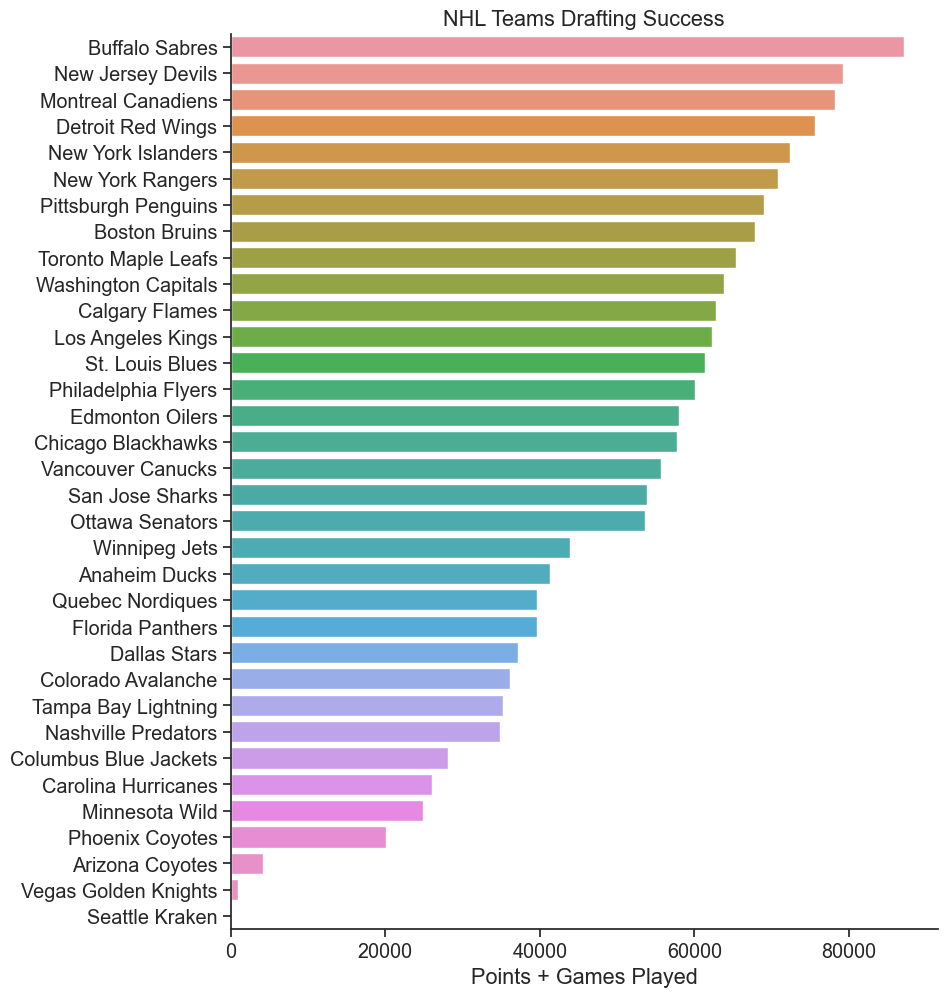

In [ ]:
#Creating groupby for sum of score by team
dfByTeam = df1982.groupby(["Team"]).sum(numeric_only=True).sort_values('Score', ascending=False)
dfByTeam['Team'] = dfByTeam.index

#Plotting data into bargraph
sns.catplot(dfByTeam, x='Score', y='Team', height=10, kind='bar', errorbar=None).set(
    title='NHL Teams Drafting Success', ylabel=None, xlabel='Points + Games Played')

 This graph shows that the Buffalo Sabres have been noticeably better than the rest of the teams with 
 their drafting. They're followed by the New Jersey Devils, Montreal Canadiens and Detroit Red Wings, while
 the rest of the league is all quite similar. There are quite a few teams that haven't been in the league for
 the entirety of 1982 - present, so they naturally have a much lower drafting score as they haven't drafted as
 many players

<Figure size 1000x1000 with 0 Axes>

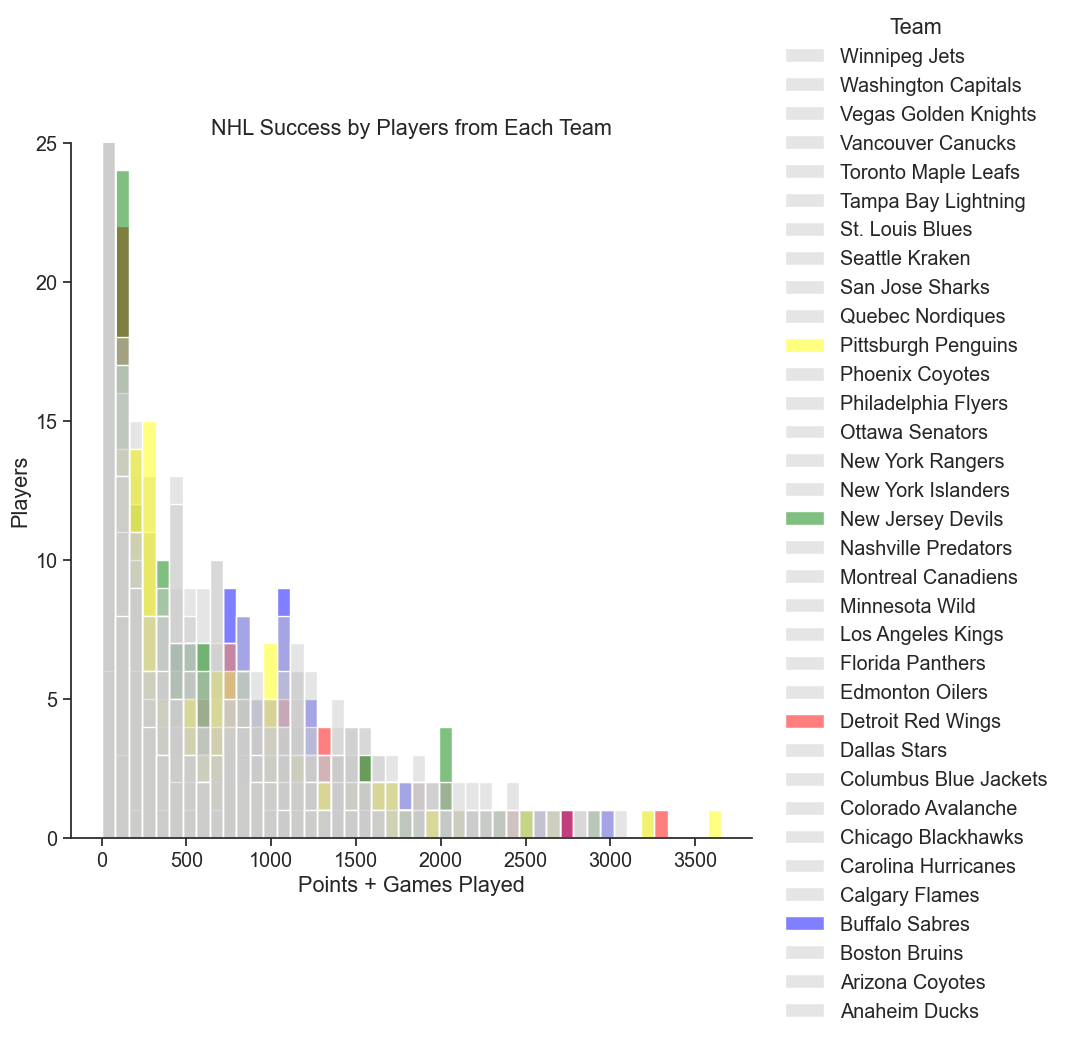

In [ ]:
fig = plt.figure(figsize=(10,10))


#Creating new palette to highlight specific teams
cols = []
for i in range(34):
    cols.append((0.8, 0.8, 0.8))
cols[10] = 'Yellow'
cols[16] = 'Green'
cols[23] = 'Red'
cols[30] = 'Blue'

#Sorting data by team and games played, then plotting
sns.displot(df1982.sort_values(by=['Team','Games Played'], ascending=False), x="Score", hue="Team",
            stat="count", common_norm=False, height=8, aspect=1, palette=cols)
plt.title("NHL Success by Players from Each Team")
plt.xlabel("Points + Games Played")
plt.ylabel("Players")
plt.ylim(0, 25)
plt.show()

Looking at the number of players at each score by some of the better teams we can get
an idea of what makes their drafting better. For example, the Buffalo Sabres have a much
larger amount of players in the 750-1250 score range than other teams. It's also interesting
that the Pittsburgh Penguins drafted both Mario Lemieux and Jaromir Jagr, who are 1st and 3rd
overall of all players drafted, yet the team is still very average with their overall drafting.
With this in mind, it seems that a higher team drafting success relies more on drafting lots of
average players, with fewer bad players than it relies on drafting the few very extremely successful players.

<seaborn.axisgrid.FacetGrid>

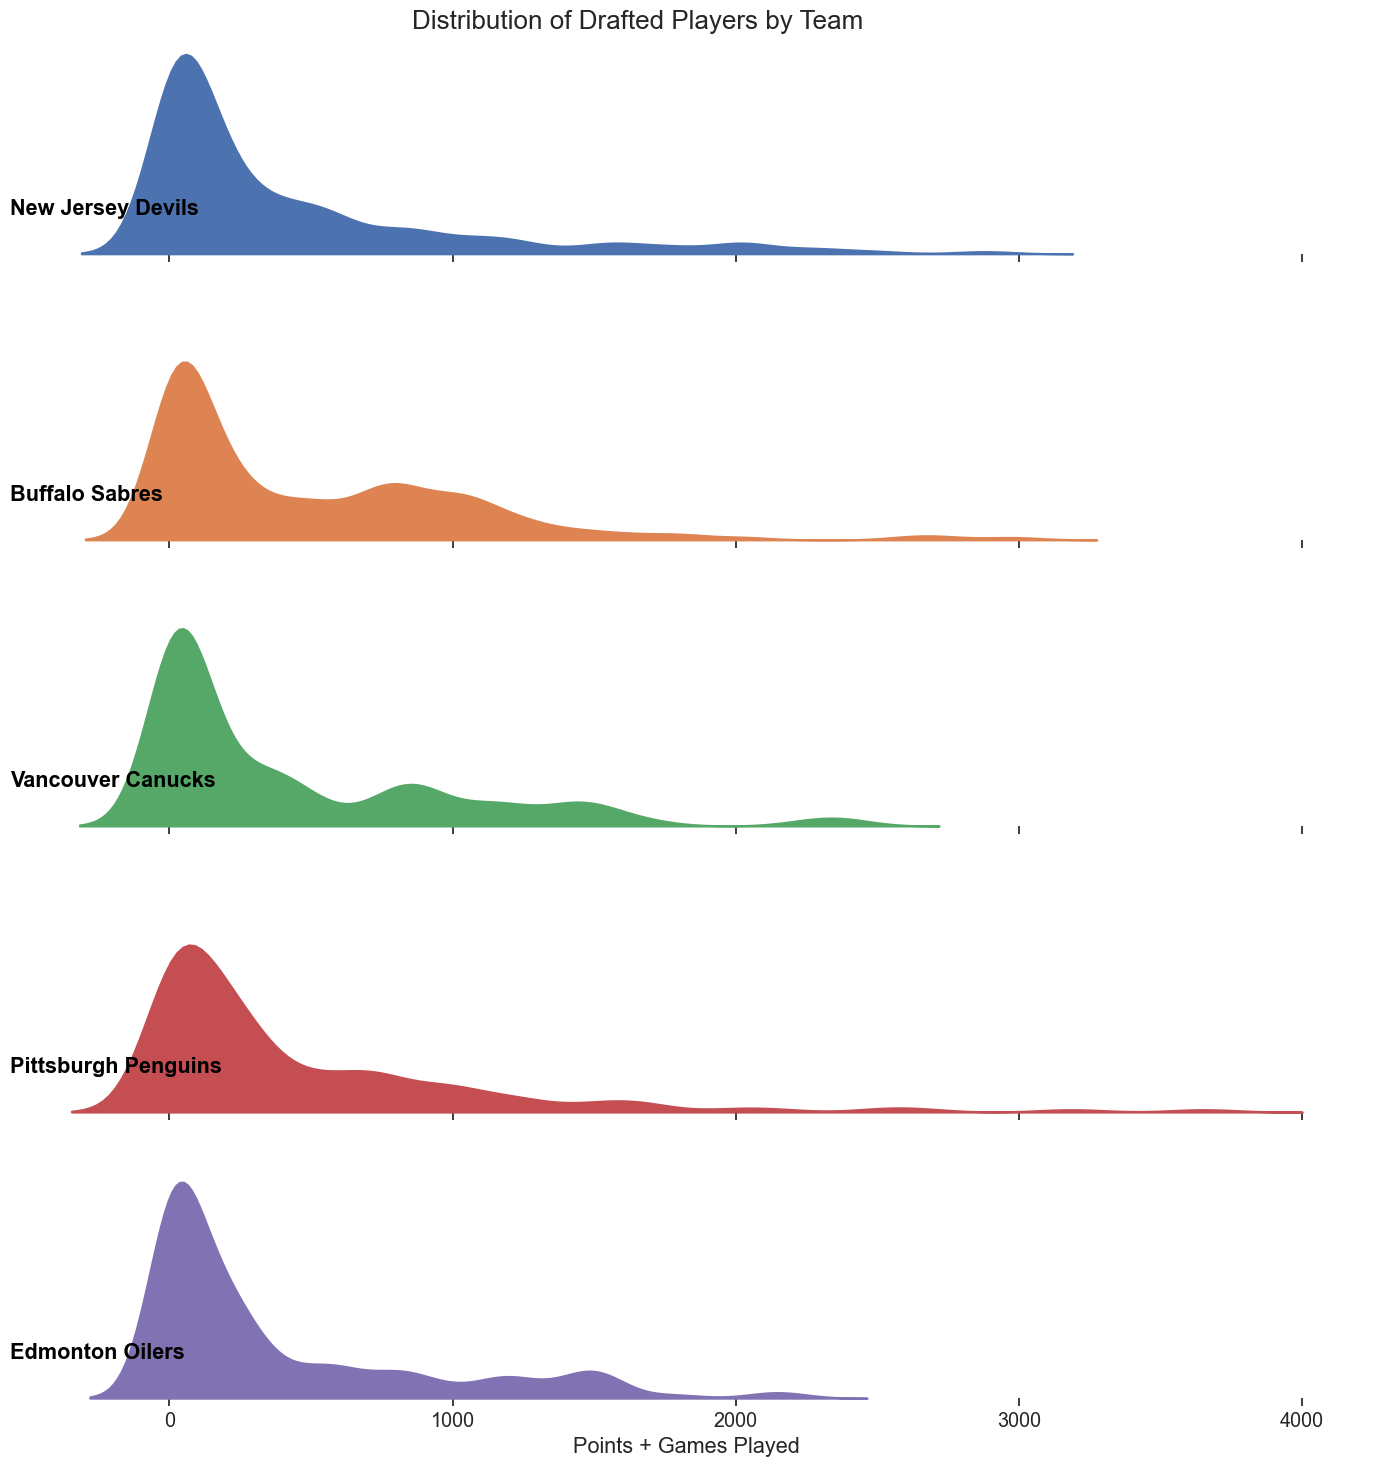

In [ ]:
df2 = df1982.query("Team == 'Buffalo Sabres' | Team == 'Pittsburgh Penguins' | Team == 'Edmonton Oilers' | Team == 'Vancouver Canucks' | Team == 'New Jersey Devils'")

# Initialize the FacetGrid object
g = sns.FacetGrid(df2, row="Team", hue="Team", aspect=5, height=3)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Score",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5, warn_singular=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color="Black",
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Score")

# Remove axes details
plt.suptitle("Distribution of Drafted Players by Team")
g.set_titles("")
g.set(yticks=[], ylabel="", xlabel="Points + Games Played")
g.despine(bottom=True, left=True)

This graph better shows the Buffalo Sabres' distribution of players success compared to some more average teams like Vancouver and Edmonton. It's interesting to not that Vancouver also has a large amount of players in the middle of the distribution, similar to Buffalo, even though they don't have a great overall draft score. It seems likely that this is due to a lack of high end talent, as well as a slighly larger amount of bad players than the other teams have. Overall this graph helps to show that drafting a lot of average/good players is better than only drafting a few superstars, however you still need to draft a few superstars to achieve better drafting success.

### Conclusion
In conclusion, the NHL team with the best drafting history is definitely the Buffalo Sabres. While there are quite a few teams that are close to Buffalo in drafting success, such as the New Jersey Devils, Montreal Canadiens, and Detroit Red Wings, they all still draft noticeably worse than the Sabres overall. This success from Buffalo seems to be most likely due to consistantly drafting solid players without drafting as many bad players, and doesn't have a lot to do with drafting extremely high-end talent. Thus, if other teams want to increase their overall drafting succes their goals shouldn't necessarily be to draft the best player in the draft, but to make sure all of their picks end up being decent players throughout their careers.